# <center> Beispiel 17.1: LANGMUIRsche Adsorptionsisotherme

Bearbeitet von Alexander Zirn

Dieses Beispiel befindet sich im Lehrbuch auf der Seite 234-235. Die Nummerierung der aus dem Lehrbuch verwendeten Gleichungen entspricht der Nummerierung im Lehrbuch. Gleichungen, die nur im vorliegenden Beispiel verwendet werden, sind durch einfache fortlaufende Zahlen gekennzeichnet.

# 1. Reaktionsgeschwindigkeit

Gemäß Beispiel 17.1 wird die Stöchiometrie der Adsorption der Komponente $\mathrm{A}_1$ an freien Adsorptionsstellen $\mathrm{A}^{\star}_0$ durch Gleichung (1) beschrieben. Die Desorption der adsorbierten Komponente $\mathrm{A}^{\star}_1$ stellt die Rückreaktion dar.

\begin{align}
\mathrm{A}_1+\mathrm{A}^{\star}_0\rightleftharpoons\mathrm{A}^{\star}_1\tag{1}
\end{align}

Die Kinetik der Ad- und Desorption wird mit den Gleichungen (2) und (3) ausgedrückt. Darin haben die verwendeten Größen folgende Einheiten: Reaktionsgeschwindigkeit $\left[r\right]=\mathrm{mol\,m^{-2}\,s^{-1}}$, Konzentration der nicht-adsorbierten $\left[c\right]=\mathrm{mol\,m^{-3}}$ und der adsorbierten Spezies $\left[c^{\star}\right]=\mathrm{mol\,m^{-2}}$, Geschwindigkeitskonstante der Adsorption $\left[k_\mathrm{ads}\right]=\mathrm{m^{3}\,mol^{-1}\,s^{-1}}$ und der Desorption $\left[k_\mathrm{des}\right]=\mathrm{s^{-1}}$.

\begin{align}
r_{\mathrm{ads},1}&=k_{\mathrm{ads},1}\,c_1\,c^{\star}_0,\tag{2}\\
r_{\mathrm{des},1}&=k_{\mathrm{des},1}\,c^{\star}_1.\tag{3}
\end{align}

Um eine Abhängigkeit vom Bedeckungsgrad zu erhalten, werden die Gleichungen (2) und (3) jeweils durch die Gesamtkonzentration an Sorptionsstellen an der Oberfläche $c^\star_\mathrm{tot}$ geteilt (mit $c^\star_\mathrm{tot} = \sum_i^N c^\star_\mathrm{i}$). Nach Umformung ergeben sich Gleichungen (4) und (5) mit $K_{\mathrm{1}}=\frac{k_{\mathrm{ads},1}}{k_{\mathrm{des},1}}$ (vgl. Gleichung 17.3b im Lehrbuch) sowie $\theta_1=\frac{c^{\star}_1}{c^\star_\mathrm{tot}}$ (vgl. Gleichung 17.6 im Lehrbuch).

\begin{align}
\frac{r_{\mathrm{ads},1}}{c^\star_\mathrm{tot}}&=k_{\mathrm{ads},1}\,c_1\,\left(1-\theta_1\right)\tag{4}\\
\frac{r_{\mathrm{des},1}}{c^\star_\mathrm{tot}}&=\frac{k_{\mathrm{ads},1}}{K_{\mathrm{1}}}\,\theta_1\tag{5}
\end{align}

Diese kinetischen Gleichungen für die Reaktionsgeschwindigkeiten der Ad- und Desorption werden in Python mittels der Funktion "rxn" implementiert. 

In [2]:
def rxn(t, theta_1, c_1):
    """ adsorption and desorption rates

    Parameters
    ----------
    t : array
        time in s
    theta_1 : array
        coverage in 1
    c_1 : array
        concentration of non-adsorbed species 1 in mol/m3

    Returns 
    -------
    array of size 2
        rates for adsorption and desorption 
    """
    
    r_ads = k_1_ads * c_1 * (1 - theta_1) # adsorption rate 
    r_des = k_1_ads / K_1 * theta_1       # desorption rate

    return [r_ads, r_des]

# 2. Bilanzgleichungen

## 2.1 Dynamischer Fall
Aus der Stoffmengenbilanz ergibt sich die zeitliche Änderung der adsorbierten Stoffmenge $n^\star_{1}$ der Komponente $\mathrm{A_1}$ aus der Differenz der Adsorptions- und Desorptionsgeschwindigkeit (Gleichung (6)). Darin ist $A_\mathrm{s}$ die Oberfläche des Sorptionsmittels. Die Oberflächenkonzentration $c^\star$ hat hier die Einheit $\mathrm{mol\,m^{-2}}$. Durch Umformung lässt sich die zeitliche Änderung des Bedeckungsgrades in Abhängigkeit der Adsorptions- und Desorptionsgeschwindigkeiten ausdrücken (Gleichung (8)). 

\begin{align}
\frac{\mathrm{d}n^\star_{1}}{\mathrm{d}t}&=\left. \left(r_{\mathrm{ads},1}-r_{\mathrm{des},1}\right)\,A_\mathrm{s}\right|:A_\mathrm{s}\tag{6}\\
\frac{\mathrm{d}c^\star_{1}}{\mathrm{d}t}&=\left. r_{\mathrm{ads},1}-r_{\mathrm{des},1}\;\right|:c^\star_\mathrm{tot}\tag{7}\\
\frac{\mathrm{d}\theta_1}{\mathrm{d}t}&=\frac{r_{\mathrm{ads},1}-r_{\mathrm{des},1}}{c^\star_\mathrm{tot}}\tag{8}
\end{align}

Diese gewöhnliche Differentialgleichung wird in Python mittels der Funktion "ode" implementiert.

In [3]:
def ode(t, theta_1, c_1):
    """ dynamic balance equation

    Parameters
    ----------
    t : array
        time in s
    theta_1 : array
        coverage in 1
    c_1 : array
        concentration non-adsorbed species in mol/m3

    Returns 
    -------
    array
        time derivative of coverage in s-1
    """
  
    r_ads, r_des = rxn(t, theta_1, c_1) # calling adsorption and desorption rate 

    dtheta_dt = (r_ads - r_des)/c_tot           # material balance
    
    return dtheta_dt

## 2.2 Stationärer Fall

Im stationären Zustand ändert sich der Bedeckungsgrad nicht über die Zeit, da Adsorption sowie Desorption ein dynamisches Gleichgewicht bilden. Entsprechend wird die zeitliche Ableitung des Bedeckungsgrads in der Bilanzgleichung (8) null gesetzt und es ergibt sich Gleichung (9).

\begin{align}
0&=r_{\mathrm{ads},1}-r_{\mathrm{des},1}\tag{9}
\end{align}

In Realität wird das dynamische Gleichgewicht und damit der stationäre Zustand erst bei $t \to \infty$ erreicht (Gleichung (10)).

\begin{align}
\lim \limits_{t \to \infty} \frac{\mathrm{d}\theta_1}{\mathrm{d}t}=0\tag{10}
\end{align}


Die Implementierung in Python erfolgt mittels der Funktion "ode_stat". "ode_stat" ruft "ode" auf und setzt die zeitlichen Ableitungen des Bedeckungsgrades (linke Seite) gleich null, um den stationären Zustand abzubilden. Diese Gleichung ist nur dann korrekt, wenn auch die rechte Seite Null ist, was erst bei $t \to \infty$ im Gleichgewicht erreicht wird. Da der Zeitpunkt $\infty$ nicht implementiert werden kann, wird die Differentialgleichung "ode" zu einem sehr späten Zeitpunkt gelöst, zu dem das Gleichgewicht praktisch erreicht ist. Im vorliegenden Beispiel wird angenommen, dass für den Zeitpunkt $t=10^{100}\,\mathrm{s}$ die Abweichungen zum Gleichgewicht vernachlässigt werden können.

Der Hintergrund dieser Vorgehensweise ist, dass dieselbe Funktion (hier "ode") für den stationären und dynamischen Fall benutzt werden kann. Der stationäre Fall wird entsprechend als Sonderfall in einer zusätzlichen Funktion (hier "ode_stat") abgebildet, die auf die allgemeine Funktion zurückgreift. Dadurch wird sichergestellt, dass ein Vergleich beider Lösungsfälle auf der selben Grundlage erfolgt.

In [4]:
def ode_stat(theta_1, c_1):
    """ stationary balance equation

    Parameters
    ----------
    theta_1 : array
        coverage in 1
    c_1 : array
        concentration non-adsorbed species in mol/m3

    Returns 
    -------
    array
        value close to zero
    """

    zero = ode(1e100, theta_1, c_1)           # mass balance
    
    return zero

# 3. Parameter und Lösen der Gleichungen

In [5]:
# IMPORT SECTION
import numpy as np                     # import of numpy
from scipy.integrate import solve_ivp  # import of initial value problem solver
import matplotlib.pyplot as plt        # import of matplotlib
from scipy.optimize import root        # import of the numerical solver function

In [6]:
## Physical properties
k_1_ads = 1 # kinetic constant adsorption
K_1 = 1     # equilibrium constant
c_tot = 1   # total concentration of surface sorption sites

## Numerical parameters
N_disc = 101 # discretization

## Starting conditions
theta_init   = [0]                                          # initial coverage of the catalyst surface in 1
c1_span      = np.array((0, 0.2, 0.4, 0.6, 0.8, 1))         # concentration of non-adsorbed species in mol/m3
c1_high_disc = np.linspace(c1_span[0], c1_span[-1], N_disc) # span for concentration of non-adsorbed species in mol/m3

## Integration spans
t_span = np.linspace(0, 5, N_disc) # time span in s
t_lim  = [t_span[0], t_span[-1]]   # lower and upper limit of time span in s

Die stationären Lösungen werden erhalten, indem "ode_stat" für verschiedene Gaskonzentrationen gelöst wird. Die Funktion "stationary_solver" gibt für alle Gaskonzentrationen aus "c_1_span" den entsprechenden Bedeckungsgrad zurück, indem die Nullstellen der Funktion "ode_stat" für alle Gaskonzentrationen bestimmt werden. Dafür bietet "scipy.optimize" die Funktion "root" an.

In [7]:
def stationary_solver(ode_stat, c_1_span):
    """ solving the stationary balance

    Parameters
    ----------
    ode_stat : array
        stationary balance equation
    c_1_span : array
        concentration of non-adsorbed species in mol/m3
    
    Returns
    ----------
    array of size N_disc
        solutions of steady-state balance for all gas concentrations in c_1_span
    """
    
    rt = np.zeros_like(c_1_span) # empty vector for solutions

    for i in np.arange(0, c_1_span.size):
        rt[i] = root(ode_stat, x0 = 0, args = (c_1_span[i]), method ='lm').x # solving of the root problem
    
    return rt

<div style="text-align: justify">
Dynamische Lösungen können erhalten werden, indem das Anfangswertproblem "ode" mittels des Anfangswertproblemsolvers von "scipy.integrate", "solve_ivp", gelöst wird. Um die Lösungen für verschiedene Konzentrationen zu erhalten, wird die Funktion "dynamic_solver" abhängig der Gaskonzentration formuliert.

In [8]:
def dynamic_solver(ode, c_1):
    """ solving the dynamic balance

    Parameters
    ----------
    ode : array
        dynamic balance equation
    c_1 : array
        concentration of non-adsorbed species in mol/m3

    Returns
    -------
    array of size N_disc
        solutions for coverage over time
    """
    
    langmuir_isotherm = solve_ivp(ode, t_lim, theta_init, t_eval = t_span, args = ([c_1])).y # solving of initial value problem 
    
    return langmuir_isotherm

# 4. Darstellung der Ergebnisse

<div style="text-align: justify">
Die dynamischen sowie stationären Lösungen sollen im Weiteren graphisch dargestellt werden.

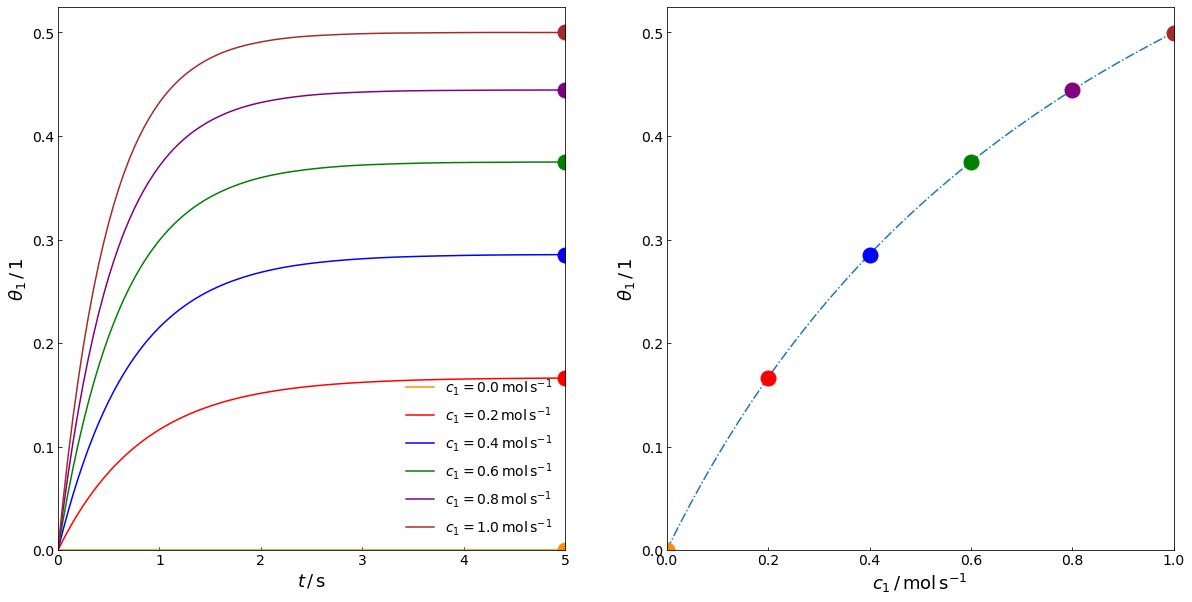

In [9]:
# Setting the figure size
colors = ['darkorange', 'red', 'blue', 'green', 'purple', 'brown']  # list of colors

fig = plt.subplots(1, 2, figsize = (20, 10)) # fixing size of diagram

plt.subplot(1, 2,1)         
for i in np.arange(0, c1_span.size):
    plt.plot(t_span, dynamic_solver(ode, c1_span[i]).T, label='$c_1 = %.1f\,\mathrm{mol\,s^{-1}}$'%(c1_span[i]), color = colors[i]) # plots dynamic solutions for all concentrations of non-adsorbed species
    plt.plot(t_span[-1], dynamic_solver(ode, c1_span[i]).T[-1], 'o', markersize=15, color = colors[i]) # plots solutions in the end of the time frame of the dynamic case for all concentrations of non-adsorbed species
plt.xlim(t_span[0],t_span[-1]) # sets limits for x-axis
plt.ylim(0, ) # sets limits for y-axis
plt.ylabel(r"$\theta_1\,/\,1$ ", fontsize = 18)# adds label to x-axis
plt.xlabel("$t\,/\,\mathrm{s}$", fontsize=18) # adds label to y-axis
plt.tick_params(labelsize=14,direction='in') # turns direction of ticks
#plt.title('(a)',fontsize=18,loc='left')       # label diagrams        
plt.legend(frameon=False, fontsize=14) # plots legend and removes frame


plt.subplot(1, 2,2)
plt.plot(c1_high_disc, stationary_solver(ode_stat, c1_high_disc), '-.') # plots steady-state solutions
for i in np.arange(0, c1_span.size):
    plt.plot(c1_span[i], dynamic_solver(ode, c1_span[i]).T[-1], 'o', markersize=15, color = colors[i]) # plots solutions in the end of the time frame of the dynamic case for all concentrations of non-adsorbed species
plt.xlim(c1_span[0],c1_span[-1]) # sets limits for x-axis
plt.ylim(0, ) # sets limits for y-axis
plt.ylabel(r"$\theta_1\,/\,1$ ", fontsize = 18)# adds label to x-axis
plt.xlabel("$c_1\,/\,\mathrm{mol\,s^{-1}}$", fontsize=18) # adds label to y-axis
plt.tick_params(labelsize=14,direction='in') # turns direction of ticks
#plt.title('(b)',fontsize=18,loc='left') # label diagrams     

#plt.figtext(0,0.04,r"$\mathbf{Abbildung\,1:}$(a) Zeitliche Änderung des Bedeckungsgrades $\theta_1$ für verschiedene Konzentrationen der nicht-adsorbierten Spezies $c_1$, (b) Bedeckungsgrad $\theta_1$ im Gleichgewicht in Abhängigkeit der Konzentrationen der nicht-adsorbierten Spezies $c_1$.", fontsize=16, horizontalalignment='left') # subtitle to the figure 
plt.show()

Die Abbildung zeigt den zeitlichen Verlauf des Bedeckungsgrads (links) sowie den stationären Bedeckungsgrad (rechts) für verschiedene Konzentrationen der Komponente $\mathrm{A_1}$. Die Bedeckungsgrade, die am Ende der Zeitspanne des dynamischen Falls erreicht wurden sind markiert (links) und entsprechenen denen im stationären Fall (rechts), da das Sorptionsgleichgewicht im dynamischen Fall praktisch bereits (fast) erreicht wurde.
 
Die linke Abbildung zeigt, dass der Bedeckungsgrad zunächst stark ansteigt und die Adsorption dominiert. Im zeitlichen Verlauf erreicht der Bedeckungsgrad asymptotisch den stationären Wert. Bereits nach $5\,\mathrm{s}$ ist keine signifikante Änderung des Bedeckungsgrades mit der Zeit festzustellen und das Sorptionsgleichgewicht ist praktisch erreicht, da die Geschwindigkeiten der Adsorption und Desorption gleich sind. Für höhere Konzentrationen der Komponente $\mathrm{A_1}$ in der fluiden Phase können höhere Gleichgewichtsbedeckungsgrade erreicht werden, da die Adsorption gegenüber der Desorption bevorzugt wird. Allerdings werden die Abstände zwischen den Gleichgewichtsbedeckungsgraden immer kleiner, was den Schluss zulässt, dass auch hier eine Sättigung erreicht wird. Dieses asymptotische Verhalten des stationären Bedeckungsgrades in Abhängigkeit der Konzentrationen von Komponente $\mathrm{A_1}$ ist auch in der rechten Abbildung zu erkennen.

Bemerkung: Es werden generische Werte für die Parameter $c^\star_\mathrm{tot} = 1\,\mathrm{mol\,m^{-2}}$, $k_{\mathrm{ads}} = 1\,\mathrm{m^{3}\,mol^{-1}\,s^{-1}}$ und $K_{\mathrm{1}} = 1\,\mathrm{m^{3}\,mol^{-1}}$ gewählt, um die prinzipiellen Verläufe darzustellen. Allerdings sind die Zahlenwerde nicht realistisch, so dass eine quantitative Interpretation der Ergebnisse im Vergleich zu Experimenten nicht sinnvoll ist. Das vorgestellte Modell ist aber geeignet, um die Parameter an eigene Messwerte anzupassen.
